In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Data Cleaning

In [2]:
movies = pd.read_csv("IMDb movies.csv")
moviesdf = pd.DataFrame(movies)

In [3]:
moviesdf.drop(columns=['budget', 'usa_gross_income', 'worlwide_gross_income', 'metascore'], inplace=True, axis=1)
moviesdf.drop(moviesdf.loc[moviesdf['year']=="TV Movie 2019"].index, inplace=True)

In [4]:
# filling in the na as 0 for reviews as reviews are on a scale of 0-10
moviesdf["reviews_from_users"].fillna(0, inplace=True)
moviesdf["reviews_from_critics"].fillna(0, inplace=True)
moviesdf.isnull().sum()

imdb_title_id              0
title                      0
original_title             0
year                       0
date_published             0
genre                      0
duration                   0
country                   64
language                 833
director                  87
writer                  1572
production_company      4455
actors                    69
description             2115
avg_vote                   0
votes                      0
reviews_from_users         0
reviews_from_critics       0
dtype: int64

In [5]:
# filling in the na for the attributes that should remain as strings
# all NA are UNKNOWN
moviesdf.fillna("UNKNOWN", inplace=True)
moviesdf.isnull().sum()

imdb_title_id           0
title                   0
original_title          0
year                    0
date_published          0
genre                   0
duration                0
country                 0
language                0
director                0
writer                  0
production_company      0
actors                  0
description             0
avg_vote                0
votes                   0
reviews_from_users      0
reviews_from_critics    0
dtype: int64

In [6]:
ratings = pd.read_csv("IMDb ratings.csv")
ratingsdf = pd.DataFrame(ratings)

In [7]:
ratingsdf.drop(columns=['allgenders_0age_avg_vote',
                         'allgenders_0age_votes',
                         'allgenders_18age_avg_vote',
                         'allgenders_18age_votes',
                         'allgenders_30age_avg_vote',
                         'allgenders_30age_votes',
                         'allgenders_45age_avg_vote',
                         'allgenders_45age_votes',
                         'males_0age_avg_vote',
                         'males_0age_votes',
                         'males_18age_avg_vote',
                         'males_18age_votes',
                         'males_30age_avg_vote',
                         'males_30age_votes', 
                         'males_45age_avg_vote', 
                         'males_45age_votes', 
                         'females_0age_avg_vote', 
                         'females_0age_votes', 
                         'females_18age_avg_vote', 
                         'females_18age_votes', 
                         'females_30age_avg_vote', 
                         'females_30age_votes', 
                         'females_45age_avg_vote', 
                         'females_45age_votes', 
                         'top1000_voters_rating', 
                         'top1000_voters_votes', 
                         'us_voters_rating', 
                         'us_voters_votes', 
                         'non_us_voters_rating', 
                         'non_us_voters_votes'], inplace=True, axis=1)

In [8]:
ratingsdf.fillna(0, inplace=True)
ratingsdf.isnull().sum()

imdb_title_id               0
weighted_average_vote       0
total_votes                 0
mean_vote                   0
median_vote                 0
votes_10                    0
votes_9                     0
votes_8                     0
votes_7                     0
votes_6                     0
votes_5                     0
votes_4                     0
votes_3                     0
votes_2                     0
votes_1                     0
males_allages_avg_vote      0
males_allages_votes         0
females_allages_avg_vote    0
females_allages_votes       0
dtype: int64

In [9]:
# merging the two merged dataframes into one complete dataframe based on 'imdb_title_id'
complete_df = pd.merge( moviesdf, ratingsdf, on='imdb_title_id', how='outer')

# removes all movies that do not have USA as one of the countries
complete_df.loc[ (complete_df['country'].str.contains('USA') == False), 'country'] = np.NaN
complete_df.dropna(inplace=True)
print(complete_df.isnull().sum()) # all n/a should be dropped

complete_df['avg_vote'] = complete_df['avg_vote'].round()
complete_df['mean_vote'] = complete_df['mean_vote'].round()

imdb_title_id               0
title                       0
original_title              0
year                        0
date_published              0
genre                       0
duration                    0
country                     0
language                    0
director                    0
writer                      0
production_company          0
actors                      0
description                 0
avg_vote                    0
votes                       0
reviews_from_users          0
reviews_from_critics        0
weighted_average_vote       0
total_votes                 0
mean_vote                   0
median_vote                 0
votes_10                    0
votes_9                     0
votes_8                     0
votes_7                     0
votes_6                     0
votes_5                     0
votes_4                     0
votes_3                     0
votes_2                     0
votes_1                     0
males_allages_avg_vote      0
males_alla

In [10]:
### Splitting Genres

col = set()

a = list(complete_df["genre"])

for w in a:
    b = set(w.split(", "))
    col = col.union(b)    

for g in col:
    complete_df[g] = 0


for g in col:
    complete_df.loc[complete_df['genre'].str.contains(g),g] = 1
    
df1 = complete_df.iloc[:,-len(col):]
df1.head(10)


,Crime,Biography,Fantasy,Thriller,Animation,Documentary,Film-Noir,Musical,Sport,History,...,Western,Family,Reality-TV,Music,Adventure,War,Mystery,Romance,Action,Drama
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
5,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
17,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
19,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
22,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
23,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
25,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
28,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
### Splitting Languages
col = set()

a = list(complete_df["language"])

for w in a:
    b = set(w.split(", "))
    col = col.union(b)    

for g in col:
    complete_df[("Language: "+g)] = 0


for g in col:
    complete_df.loc[complete_df['language'].str.contains(g), ("Language: "+g)] = 1

languages = ["Language: " + lang for lang in col]
df1 = complete_df.iloc[:,-len(col):]
df1.head(10)

,Language: Washoe,Language: Algonquin,Language: Mende,Language: Cree,Language: Swedish,Language: Wolof,Language: Spanish,Language: Polynesian,Language: Tok Pisin,Language: Latin,...,Language: Somali,Language: Swahili,Language: Middle English,Language: Lingala,Language: Polish,Language: Basque,Language: Zulu,Language: Apache languages,Language: Acholi,Language: Hawaiian
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
22,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
23,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
25,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
28,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
### Changing Production Company to Numeric

prod_companys = {"Name": [], "UID": []}
ls = complete_df["production_company"].unique()
for idx, x in enumerate(ls):
    prod_companys["Name"].append(x)
    prod_companys ["UID"].append(idx)
    complete_df["production_company"].replace(x, idx, inplace=True)

complete_df.head(3)

,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,...,Language: Somali,Language: Swahili,Language: Middle English,Language: Lingala,Language: Polish,Language: Basque,Language: Zulu,Language: Apache languages,Language: Acholi,Language: Hawaiian
0,tt0000009,Miss Jerry,Miss Jerry,1894,1894-10-09,Romance,45.0,USA,None,Alexander Black,...,0,0,0,0,0,0,0,0,0,0
3,tt0002101,Cleopatra,Cleopatra,1912,11/13/12,"Drama, History",100.0,USA,English,Charles L. Gaskill,...,0,0,0,0,0,0,0,0,0,0
5,tt0002199,"From the Manger to the Cross; or, Jesus of Naz...","From the Manger to the Cross; or, Jesus of Naz...",1912,1913,"Biography, Drama",60.0,USA,English,Sidney Olcott,...,0,0,0,0,0,0,0,0,0,0


In [13]:
### Changing Writers to Numeric

writers = {"Name": [], "UID": []}
ls = complete_df["writer"].unique()
for idx, x in enumerate(ls):
    writers["Name"].append(x)
    writers["UID"].append(idx)
    complete_df["writer"].replace(x, idx, inplace=True)

complete_df.head(3)

,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,...,Language: Somali,Language: Swahili,Language: Middle English,Language: Lingala,Language: Polish,Language: Basque,Language: Zulu,Language: Apache languages,Language: Acholi,Language: Hawaiian
0,tt0000009,Miss Jerry,Miss Jerry,1894,1894-10-09,Romance,45.0,USA,None,Alexander Black,...,0,0,0,0,0,0,0,0,0,0
3,tt0002101,Cleopatra,Cleopatra,1912,11/13/12,"Drama, History",100.0,USA,English,Charles L. Gaskill,...,0,0,0,0,0,0,0,0,0,0
5,tt0002199,"From the Manger to the Cross; or, Jesus of Naz...","From the Manger to the Cross; or, Jesus of Naz...",1912,1913,"Biography, Drama",60.0,USA,English,Sidney Olcott,...,0,0,0,0,0,0,0,0,0,0


# EDA

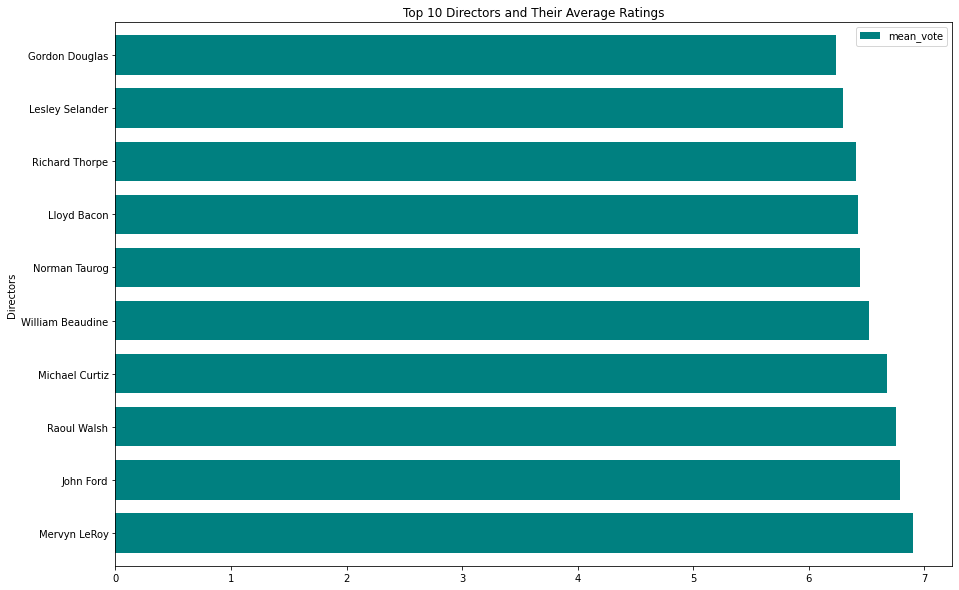

In [14]:
# to get the mena of the avg votes
directors_mean_df = complete_df.groupby(['director'])[['mean_vote']].mean()

# to get the total movies they worked on
directors_total_df = complete_df.groupby(['director'])[['title']].count()

all_directors_df = pd.concat([directors_mean_df, directors_total_df], axis=1)
all_directors_df = all_directors_df.sort_values(['title'], ascending = False)

top_ten_directors = all_directors_df.head(10)

top_ten_directors = top_ten_directors.sort_values(['mean_vote'], ascending = False)
top_ten_directors.plot.barh(figsize=(15,10), y='mean_vote', width=.75, xlabel="Directors", title="Top 10 Directors and Their Average Ratings", color=["teal"]);


In [15]:
### More data cleaning

directors = {"Name": [], "UID": []}
ls = complete_df["director"].unique()
for idx, x in enumerate(ls):
    directors["Name"].append(x)
    directors["UID"].append(idx)
    complete_df["director"].replace(x, idx, inplace=True)
    

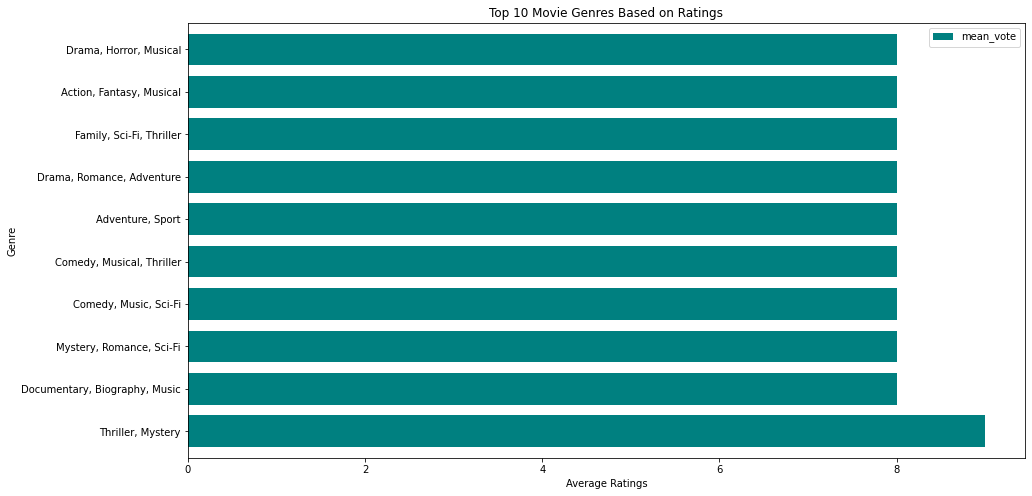

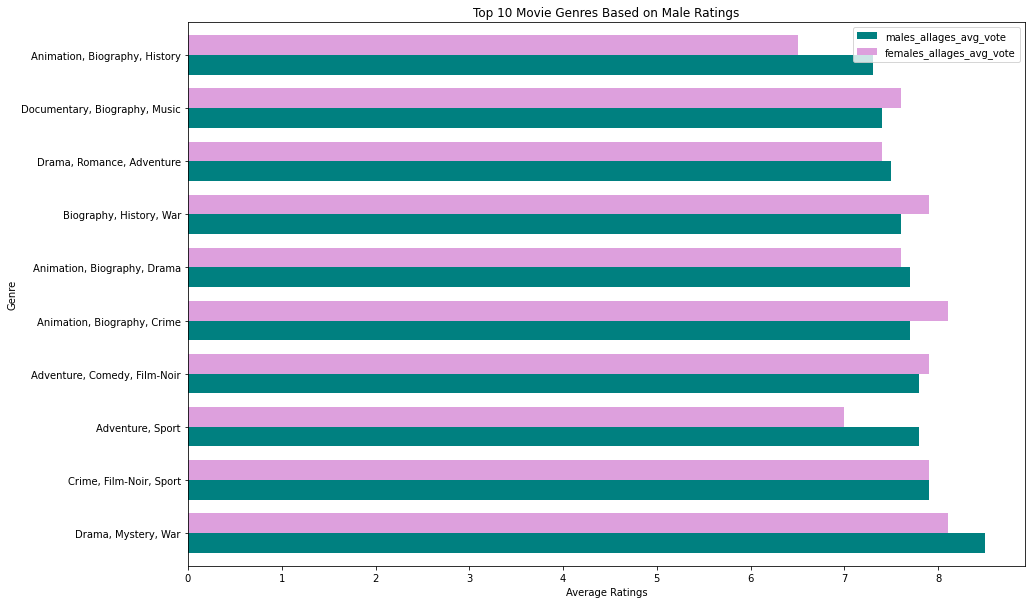

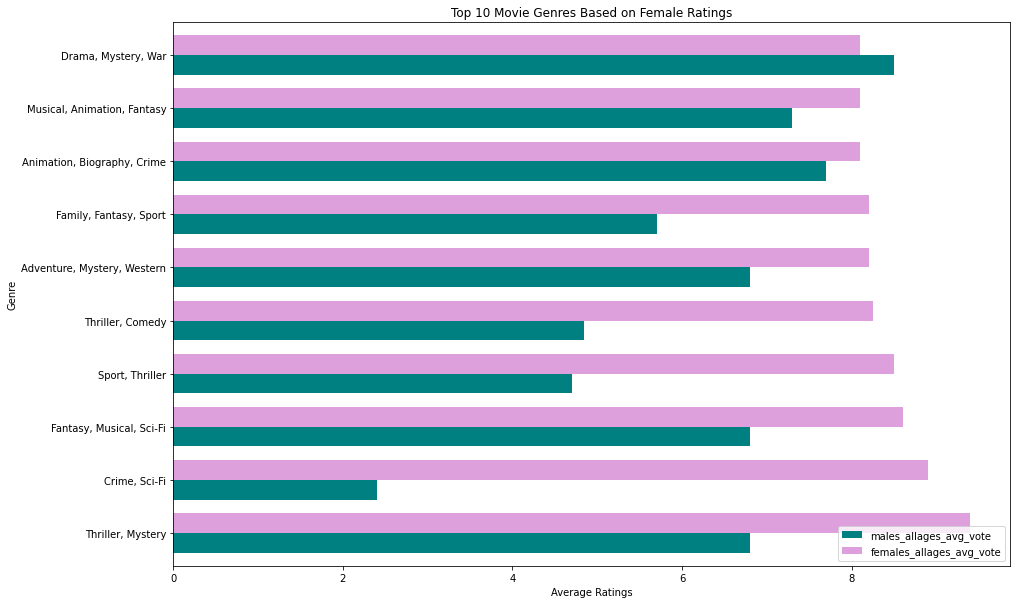

In [16]:
genredf = complete_df.groupby(['genre'])[['mean_vote']].mean().reset_index();
genredf = genredf.sort_values(['mean_vote'], ascending = False);

toptengenre = genredf.head(10)

toptengenre.plot.barh(figsize=(15,8), x="genre", width=.75, xlabel="Genre", title="Top 10 Movie Genres Based on Ratings", color="teal");
plt.xlabel("Average Ratings")
plt.xticks(rotation='horizontal');


male_female_genre = complete_df.groupby(['genre'])[['males_allages_avg_vote', 'females_allages_avg_vote']].mean().reset_index();
male_genre = male_female_genre.sort_values(['males_allages_avg_vote'], ascending = False);
female_genre = male_female_genre.sort_values(['females_allages_avg_vote'], ascending = False);


male_genre = male_genre.head(10)
male_genre.plot.barh(figsize=(15,10), x="genre", width=.75, xlabel="Genre", title="Top 10 Movie Genres Based on Male Ratings", color=["teal", "plum"]);
plt.xlabel("Average Ratings");


female_genre = female_genre.head(10)
female_genre.plot.barh(figsize=(15,10), x="genre", width=.75, xlabel="Genre", title="Top 10 Movie Genres Based on Female Ratings", color=["teal", "plum"]);
plt.xlabel("Average Ratings");

In [17]:
Comedy = complete_df.groupby(['Comedy'])[['males_allages_avg_vote']].mean().reset_index();
Action = complete_df.groupby(['Action'])[['males_allages_avg_vote']].mean().reset_index();
Horror = complete_df.groupby(['Horror'])[['males_allages_avg_vote']].mean().reset_index();
Family = complete_df.groupby(['Family'])[['males_allages_avg_vote']].mean().reset_index();
Musical = complete_df.groupby(['Musical'])[['males_allages_avg_vote']].mean().reset_index();
Music = complete_df.groupby(['Music'])[['males_allages_avg_vote']].mean().reset_index();
Documentary = complete_df.groupby(['Documentary'])[['males_allages_avg_vote']].mean().reset_index();
Mystery = complete_df.groupby(['Mystery'])[['males_allages_avg_vote']].mean().reset_index();
Sci_Fi = complete_df.groupby(['Sci-Fi'])[['males_allages_avg_vote']].mean().reset_index();
News = complete_df.groupby(['News'])[['males_allages_avg_vote']].mean().reset_index();
Crime = complete_df.groupby(['Crime'])[['males_allages_avg_vote']].mean().reset_index();
Adventure = complete_df.groupby(['Adventure'])[['males_allages_avg_vote']].mean().reset_index();
Film_Noir = complete_df.groupby(['Film-Noir'])[['males_allages_avg_vote']].mean().reset_index();
History = complete_df.groupby(['History'])[['males_allages_avg_vote']].mean().reset_index();
Thriller = complete_df.groupby(['Thriller'])[['males_allages_avg_vote']].mean().reset_index();
Sport = complete_df.groupby(['Sport'])[['males_allages_avg_vote']].mean().reset_index();
Western = complete_df.groupby(['Western'])[['males_allages_avg_vote']].mean().reset_index();
Biography = complete_df.groupby(['Biography'])[['males_allages_avg_vote']].mean().reset_index();
War = complete_df.groupby(['War'])[['males_allages_avg_vote']].mean().reset_index();
Fantasy = complete_df.groupby(['Fantasy'])[['males_allages_avg_vote']].mean().reset_index();
Reality_TV = complete_df.groupby(['Reality-TV'])[['males_allages_avg_vote']].mean().reset_index();
Drama = complete_df.groupby(['Drama'])[['males_allages_avg_vote']].mean().reset_index();
Animation = complete_df.groupby(['Animation'])[['males_allages_avg_vote']].mean().reset_index();
Romance = complete_df.groupby(['Romance'])[['males_allages_avg_vote']].mean().reset_index();
Adult = complete_df.groupby(['Adult'])[['males_allages_avg_vote']].mean().reset_index();
genres = pd.concat([Comedy, Action, Horror, Family, Musical, Music, Documentary, Mystery, Sci_Fi, News, Crime, Adventure, Film_Noir, History, Thriller, Sport, Western, Biography, War, Fantasy, Reality_TV, Drama, Animation, Romance, Adult], axis=1);
genres = genres.drop([0])
male_genres_melt = genres.melt(id_vars=[], 
                          var_name="Genre", 
                          value_name="Male Mean Vote")

male_genres_melt = male_genres_melt.loc[male_genres_melt["Male Mean Vote"] != 1.00000]

genres = ['Comedy', 'Action', 'Horror', 'Family', 'Musical', 'Music', 'Documentary', 'Mystery', 'Sci-Fi', 'News', 'Crime', 'Adventure', 'Film-Noir', 'History', 'Thriller', 'Sport', 'Western', 'Biography', 'War', 'Fantasy', 'Reality-TV', 'Drama', 'Animation', 'Romance', 'Adult']

male_genres_melt.insert(loc=0, column='Genres', value=genres)
male_genres_melt.head()

male_genres_melt.drop(['Genre'], axis=1)


,Genres,Male Mean Vote
1,Comedy,5.608016
3,Action,5.265715
5,Horror,4.483483
7,Family,5.485058
9,Musical,6.010323
11,Music,5.981324
13,Documentary,7.400000
15,Mystery,5.552275
17,Sci-Fi,4.807817
19,News,6.000000


In [18]:
Comedy = complete_df.groupby(['Comedy'])[['females_allages_avg_vote']].mean().reset_index();
Action = complete_df.groupby(['Action'])[['females_allages_avg_vote']].mean().reset_index();
Horror = complete_df.groupby(['Horror'])[['females_allages_avg_vote']].mean().reset_index();
Family = complete_df.groupby(['Family'])[['females_allages_avg_vote']].mean().reset_index();
Musical = complete_df.groupby(['Musical'])[['females_allages_avg_vote']].mean().reset_index();
Music = complete_df.groupby(['Music'])[['females_allages_avg_vote']].mean().reset_index();
Documentary = complete_df.groupby(['Documentary'])[['females_allages_avg_vote']].mean().reset_index();
Mystery = complete_df.groupby(['Mystery'])[['females_allages_avg_vote']].mean().reset_index();
Sci_Fi = complete_df.groupby(['Sci-Fi'])[['females_allages_avg_vote']].mean().reset_index();
News = complete_df.groupby(['News'])[['females_allages_avg_vote']].mean().reset_index();
Crime = complete_df.groupby(['Crime'])[['females_allages_avg_vote']].mean().reset_index();
Adventure = complete_df.groupby(['Adventure'])[['females_allages_avg_vote']].mean().reset_index();
Film_Noir = complete_df.groupby(['Film-Noir'])[['females_allages_avg_vote']].mean().reset_index();
History = complete_df.groupby(['History'])[['females_allages_avg_vote']].mean().reset_index();
Thriller = complete_df.groupby(['Thriller'])[['females_allages_avg_vote']].mean().reset_index();
Sport = complete_df.groupby(['Sport'])[['females_allages_avg_vote']].mean().reset_index();
Western = complete_df.groupby(['Western'])[['females_allages_avg_vote']].mean().reset_index();
Biography = complete_df.groupby(['Biography'])[['females_allages_avg_vote']].mean().reset_index();
War = complete_df.groupby(['War'])[['females_allages_avg_vote']].mean().reset_index();
Fantasy = complete_df.groupby(['Fantasy'])[['females_allages_avg_vote']].mean().reset_index();
Reality_TV = complete_df.groupby(['Reality-TV'])[['females_allages_avg_vote']].mean().reset_index();
Drama = complete_df.groupby(['Drama'])[['females_allages_avg_vote']].mean().reset_index();
Animation = complete_df.groupby(['Animation'])[['females_allages_avg_vote']].mean().reset_index();
Romance = complete_df.groupby(['Romance'])[['females_allages_avg_vote']].mean().reset_index();
Adult = complete_df.groupby(['Adult'])[['females_allages_avg_vote']].mean().reset_index();
genres = pd.concat([Comedy, Action, Horror, Family, Musical, Music, Documentary, Mystery, Sci_Fi, News, Crime, Adventure, Film_Noir, History, Thriller, Sport, Western, Biography, War, Fantasy, Reality_TV, Drama, Animation, Romance, Adult], axis=1);
genres = genres.drop([0])
female_genres_melt = genres.melt(id_vars=[], 
                          var_name="Genre", 
                          value_name="Female Mean Vote")

female_genres_melt = female_genres_melt.loc[female_genres_melt["Female Mean Vote"] != 1.00000]

genres = ['Comedy', 'Action', 'Horror', 'Family', 'Musical', 'Music', 'Documentary', 'Mystery', 'Sci-Fi', 'News', 'Crime', 'Adventure', 'Film-Noir', 'History', 'Thriller', 'Sport', 'Western', 'Biography', 'War', 'Fantasy', 'Reality-TV', 'Drama', 'Animation', 'Romance', 'Adult']

female_genres_melt.insert(loc=0, column='Genres', value=genres)
female_genres_melt.head()

female_genres_melt.drop(['Genre'], axis=1)


,Genres,Female Mean Vote
1,Comedy,5.880789
3,Action,5.540464
5,Horror,4.707007
7,Family,6.061849
9,Musical,6.387174
11,Music,6.351722
13,Documentary,7.600000
15,Mystery,5.824495
17,Sci-Fi,5.079846
19,News,7.500000


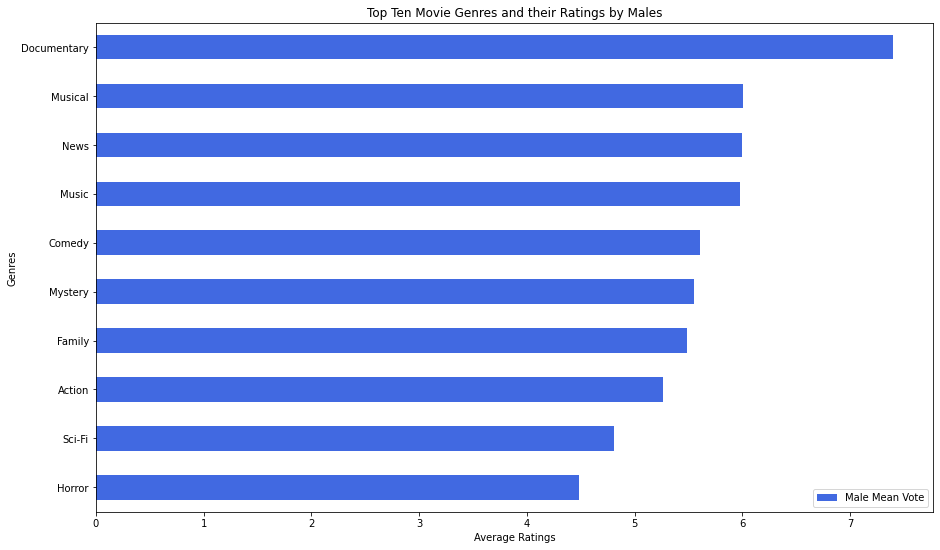

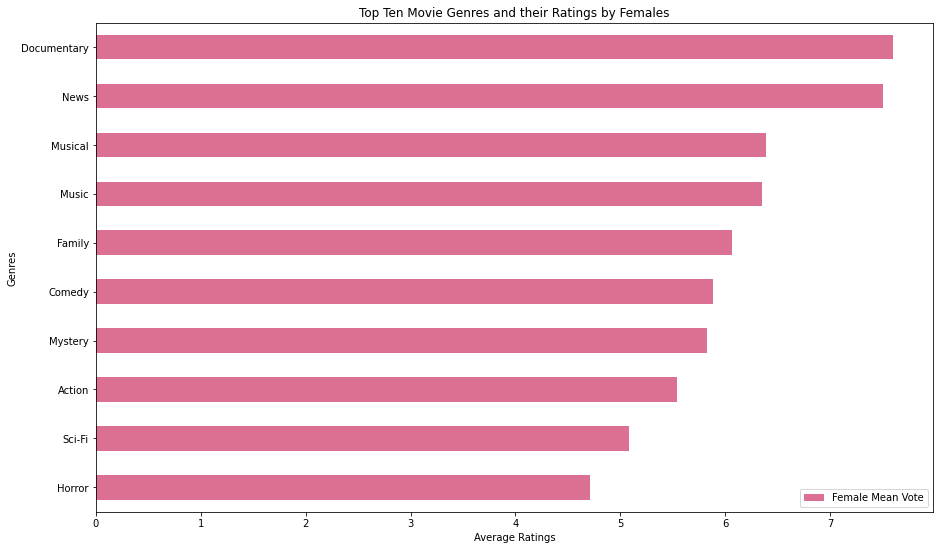

In [19]:
# Top ten movie genres based on ratings by male and females
top_ten_male_genres_melt = male_genres_melt.head(10)
top_ten_female_genres_melt = female_genres_melt.head(10)

top_ten_male_genres_melt = top_ten_male_genres_melt.sort_values(['Male Mean Vote'], ascending = True);
top_ten_female_genres_melt = top_ten_female_genres_melt.sort_values(['Female Mean Vote'], ascending = True);

top_ten_male_genres_melt.plot(figsize=(15,9), kind="barh", x="Genres", color="royalblue", title="Top Ten Movie Genres and their Ratings by Males")
plt.xlabel("Average Ratings")
top_ten_female_genres_melt.plot(figsize=(15,9), kind="barh", x="Genres", color="palevioletred", title="Top Ten Movie Genres and their Ratings by Females")
plt.xlabel("Average Ratings");

In [20]:
Comedy = complete_df.groupby(['Comedy'])[['mean_vote']].mean().reset_index();
Action = complete_df.groupby(['Action'])[['mean_vote']].mean().reset_index();
Horror = complete_df.groupby(['Horror'])[['mean_vote']].mean().reset_index();
Family = complete_df.groupby(['Family'])[['mean_vote']].mean().reset_index();
Musical = complete_df.groupby(['Musical'])[['mean_vote']].mean().reset_index();
Music = complete_df.groupby(['Music'])[['mean_vote']].mean().reset_index();
Documentary = complete_df.groupby(['Documentary'])[['mean_vote']].mean().reset_index();
Mystery = complete_df.groupby(['Mystery'])[['mean_vote']].mean().reset_index();
Sci_Fi = complete_df.groupby(['Sci-Fi'])[['mean_vote']].mean().reset_index();
News = complete_df.groupby(['News'])[['mean_vote']].mean().reset_index();
Crime = complete_df.groupby(['Crime'])[['mean_vote']].mean().reset_index();
Adventure = complete_df.groupby(['Adventure'])[['mean_vote']].mean().reset_index();
Film_Noir = complete_df.groupby(['Film-Noir'])[['mean_vote']].mean().reset_index();
History = complete_df.groupby(['History'])[['mean_vote']].mean().reset_index();
Thriller = complete_df.groupby(['Thriller'])[['mean_vote']].mean().reset_index();
Sport = complete_df.groupby(['Sport'])[['mean_vote']].mean().reset_index();
Western = complete_df.groupby(['Western'])[['mean_vote']].mean().reset_index();
Biography = complete_df.groupby(['Biography'])[['mean_vote']].mean().reset_index();
War = complete_df.groupby(['War'])[['mean_vote']].mean().reset_index();
Fantasy = complete_df.groupby(['Fantasy'])[['mean_vote']].mean().reset_index();
Reality_TV = complete_df.groupby(['Reality-TV'])[['mean_vote']].mean().reset_index();
Drama = complete_df.groupby(['Drama'])[['mean_vote']].mean().reset_index();
Animation = complete_df.groupby(['Animation'])[['mean_vote']].mean().reset_index();
Romance = complete_df.groupby(['Romance'])[['mean_vote']].mean().reset_index();
Adult = complete_df.groupby(['Adult'])[['mean_vote']].mean().reset_index();
genres = pd.concat([Comedy, Action, Horror, Family, Musical, Music, Documentary, Mystery, Sci_Fi, News, Crime, Adventure, Film_Noir, History, Thriller, Sport, Western, Biography, War, Fantasy, Reality_TV, Drama, Animation, Romance, Adult], axis=1);
genres = genres.drop([0])
genres_melt = genres.melt(id_vars=[], 
                          var_name="Genre", 
                          value_name="Mean Vote")

genres_melt = genres_melt.loc[genres_melt["Mean Vote"] != 1.00000]

genres = ['Comedy', 'Action', 'Horror', 'Family', 'Musical', 'Music', 'Documentary', 'Mystery', 'Sci-Fi', 'News', 'Crime', 'Adventure', 'Film-Noir', 'History', 'Thriller', 'Sport', 'Western', 'Biography', 'War', 'Fantasy', 'Reality-TV', 'Drama', 'Animation', 'Romance', 'Adult']

genres_melt.insert(loc=0, column='Genres', value=genres)
genres_melt.head()

genres_melt.drop(['Genre'], axis=1)


,Genres,Mean Vote
1,Comedy,6.085255
3,Action,5.699896
5,Horror,5.051570
7,Family,6.129822
9,Musical,6.472367
11,Music,6.431109
13,Documentary,8.000000
15,Mystery,5.946577
17,Sci-Fi,5.285133
19,News,7.000000


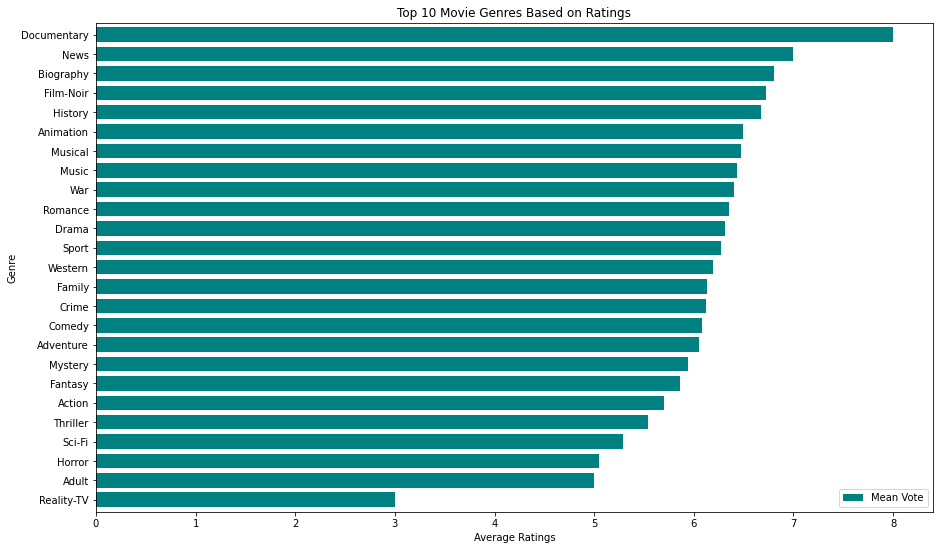

In [21]:
# Top ten movie genres based on ratings
genres_melt = genres_melt.sort_values(['Mean Vote'], ascending = True);
genres_melt.plot.barh(figsize=(15,9), x="Genres", width=.75, xlabel="Genre", title="Top 10 Movie Genres Based on Ratings", color="teal");
plt.xlabel("Average Ratings")
plt.xticks(rotation='horizontal');

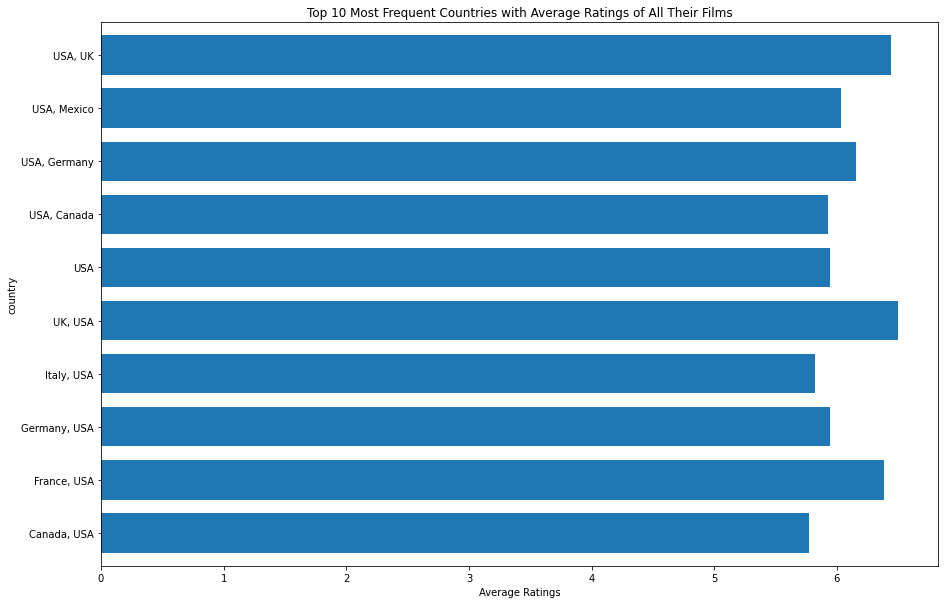

In [22]:
## EDA, Looking For Relation between Country Origin & Rating
## ---------------------------------------------------------

## Finding Most Used Countries (top 10)
most_freq_countries = list(complete_df['country'].value_counts()[:10].index)

## Shrink Dataframe by Top10 Countries
df_ = complete_df[complete_df['country'].isin(most_freq_countries)]

## Calculating Avg Rating per Countries
s = df_.groupby(by=['country'])['mean_vote'].sum() #sum
c = df_['country'].value_counts()                  #counts

s.sort_index(inplace=True)
c.sort_index(inplace=True)

avg_rating_countries = s/c

## Graphing Findings
avg_rating_countries.plot.barh(figsize=(15,10), width=.75, title="Top 10 Most Frequent Countries with Average Ratings of All Their Films")
plt.xlabel("Average Ratings")
plt.show()

Text(0.5, 0, 'Counts')

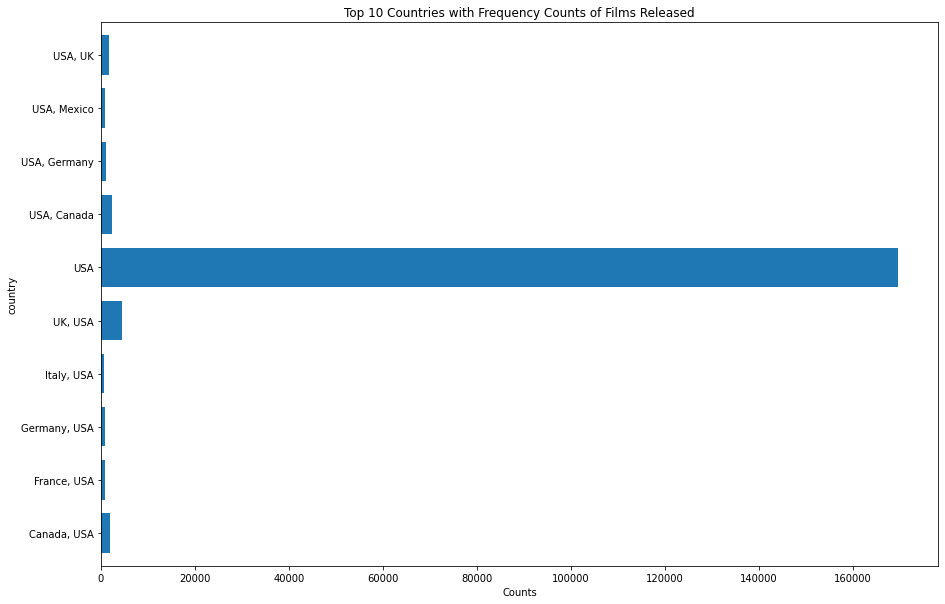

In [23]:
## EDA, Looking For Relation between Country Origin & Rating (Continued)
## ---------------------------------------------------------

#Plotting Freq Counts
s.plot.barh(figsize=(15,10), width=.75, title="Top 10 Countries with Frequency Counts of Films Released")
plt.xlabel("Counts")

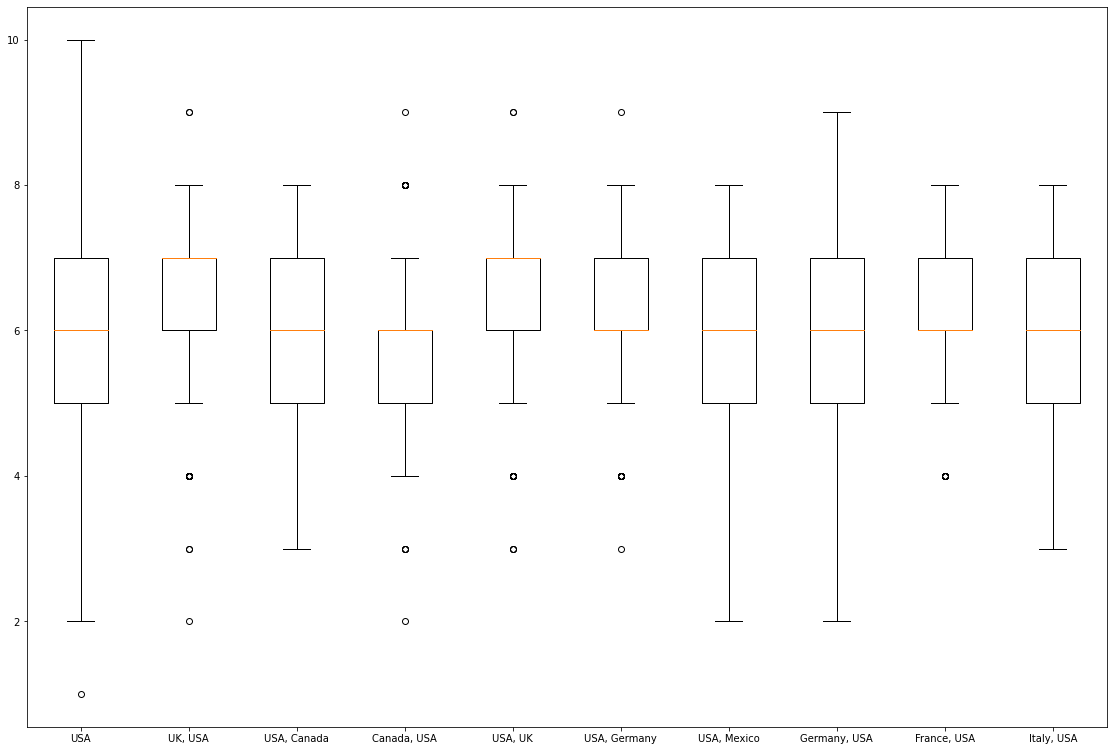

In [24]:
## EDA, Looking For Relation between Country Origin & Rating (Continued)
## ---------------------------------------------------------

fig = plt.figure(figsize=(15,10))
ax = fig.add_axes([0,0,1,1])
country = []
#Plotting Quartile Info
for i in most_freq_countries:
    df2 = df_[df_['country'] == i]
    country.append(df2['mean_vote'])
    
ax.set_xticklabels(most_freq_countries)
bp = ax.boxplot(country)

plt.show()

# Modeling

In [25]:
df = complete_df

## I did this to speed up the models. Models looking at 30%
df = df.sample(frac = .3)
df_test = df.drop(df.index)

In [26]:
list(df.columns)

['imdb_title_id',
 'title',
 'original_title',
 'year',
 'date_published',
 'genre',
 'duration',
 'country',
 'language',
 'director',
 'writer',
 'production_company',
 'actors',
 'description',
 'avg_vote',
 'votes',
 'reviews_from_users',
 'reviews_from_critics',
 'weighted_average_vote',
 'total_votes',
 'mean_vote',
 'median_vote',
 'votes_10',
 'votes_9',
 'votes_8',
 'votes_7',
 'votes_6',
 'votes_5',
 'votes_4',
 'votes_3',
 'votes_2',
 'votes_1',
 'males_allages_avg_vote',
 'males_allages_votes',
 'females_allages_avg_vote',
 'females_allages_votes',
 'Crime',
 'Biography',
 'Fantasy',
 'Thriller',
 'Animation',
 'Documentary',
 'Film-Noir',
 'Musical',
 'Sport',
 'History',
 'Comedy',
 'Sci-Fi',
 'News',
 'Horror',
 'Adult',
 'Western',
 'Family',
 'Reality-TV',
 'Music',
 'Adventure',
 'War',
 'Mystery',
 'Romance',
 'Action',
 'Drama',
 'Language: Washoe',
 'Language: Algonquin',
 'Language: Mende',
 'Language: Cree',
 'Language: Swedish',
 'Language: Wolof',
 'Language: S

In [27]:
from sklearn.linear_model import LogisticRegression

features = ['Comedy', 'Action', 'Horror', 'Family', 'Musical', 'Music', 'Documentary', 'Mystery', 'duration', 'year', 'Sci-Fi', 'News', 'Crime', 'Adventure', 'Film-Noir', 'History', 'Thriller', 'Sport', 'Western', 'Biography', 'War', 'Fantasy', 'Reality-TV', 'Drama', 'Animation', 'Romance', 'Adult']
added_features = ["director", "writer", "production_company"] + languages


# f = features + added_features

X = np.array(df[features])
y = np.array(df['mean_vote']) 

In [28]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state = 35)

In [30]:
def logR_pred_model( test_split, X_set, y_set, shouldGraph = False):
    X_train, X_test, y_train, y_test = train_test_split(X_set, y_set, test_size = test_split, random_state = 35)
    lr = LogisticRegression()
    lr.fit(X_train, y_train)
    y_pred = lr.predict(X_test)
    if shouldGraph:
        x_axis = range(len(y_prob))[:50]

        plt.figure(figsize=(8, 8))
        plt.scatter(x_axis, y_pred[:50], color="red", label="predictions")
        plt.scatter(x_axis, y_test[:50], label="real values")
        plt.title("LogR First 50 observations")
        plt.legend()
        plt.show()
    print(metrics.classification_report(y_test, y_pred))

logR_pred_model( 0.30, X, y)

### Failed to converge, lacked accuracy above 50%

              precision    recall  f1-score   support

         2.0       0.00      0.00      0.00        13
         3.0       0.00      0.00      0.00        91
         4.0       0.00      0.00      0.00       295
         5.0       0.00      0.00      0.00       489
         6.0       0.39      0.88      0.54      1167
         7.0       0.41      0.22      0.29       787
         8.0       0.23      0.01      0.02       235
         9.0       0.00      0.00      0.00        13

    accuracy                           0.39      3090
   macro avg       0.13      0.14      0.11      3090
weighted avg       0.27      0.39      0.28      3090



Classes  [1. 2. 3. 4. 5. 6. 7. 8. 9.]
Confusion matrix, without normalization
[[   0    0    0    0   13    0    0    0]
 [   0    0    0    0   89    2    0    0]
 [   0    0    0    0  287    8    0    0]
 [   0    0    0    0  471   16    2    0]
 [   0    0    0    0 1031  131    5    0]
 [   0    0    0    0  610  176    1    0]
 [   0    0    0    0  142   90    3    0]
 [   0    0    0    0    8    3    2    0]]
Normalized confusion matrix
[[0.   0.   0.   0.   1.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.98 0.02 0.   0.  ]
 [0.   0.   0.   0.   0.97 0.03 0.   0.  ]
 [0.   0.   0.   0.   0.96 0.03 0.   0.  ]
 [0.   0.   0.   0.   0.88 0.11 0.   0.  ]
 [0.   0.   0.   0.   0.78 0.22 0.   0.  ]
 [0.   0.   0.   0.   0.6  0.38 0.01 0.  ]
 [0.   0.   0.   0.   0.62 0.23 0.15 0.  ]]


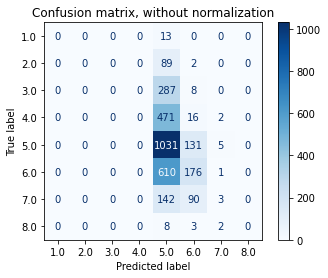

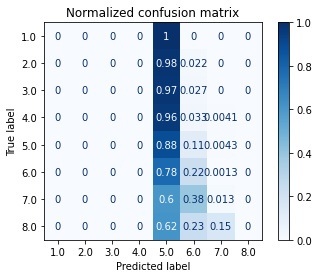

In [31]:
# Confusion w/ lr

from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

lr = LogisticRegression()
classifier = lr.fit(X_train, y_train)
class_names = classifier.classes_
print("Classes ", class_names )

np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
titles_options = [
    ("Confusion matrix, without normalization", None),
    ("Normalized confusion matrix", "true"),
]
for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(
        classifier,
        X_test,
        y_test,
        display_labels=class_names[:8],
        cmap=plt.cm.Blues,
        normalize=normalize,
    )
    disp.ax_.set_title(title)
    print(title)
    print(disp.confusion_matrix)
    

plt.show()


KNeighborsClassifier with testing 30%


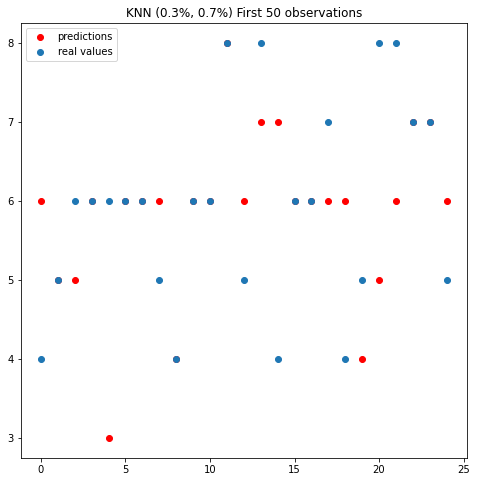

              precision    recall  f1-score   support

         2.0       0.00      0.00      0.00        13
         3.0       0.16      0.12      0.14        91
         4.0       0.22      0.21      0.22       295
         5.0       0.22      0.23      0.22       489
         6.0       0.43      0.53      0.47      1167
         7.0       0.39      0.34      0.37       787
         8.0       0.25      0.09      0.13       235
         9.0       0.00      0.00      0.00        13

    accuracy                           0.35      3090
   macro avg       0.21      0.19      0.19      3090
weighted avg       0.34      0.35      0.34      3090

KNeighborsClassifier with testing 50%
              precision    recall  f1-score   support

         2.0       0.00      0.00      0.00        20
         3.0       0.09      0.05      0.06       153
         4.0       0.21      0.19      0.20       483
         5.0       0.23      0.24      0.23       830
         6.0       0.41      0.51      0

In [32]:
def knn_pred_model( test_split, X_set, y_set, shouldGraph = False):
    X_train, X_test, y_train, y_test = train_test_split(X_set, y_set, test_size = test_split, random_state = 35)
    reg_knn = KNeighborsClassifier()
    reg_knn.fit(X_train, y_train)
    y_pred = reg_knn.predict(X_test)
    if shouldGraph:
        x_axis = range(len(y_set))[:25]

        plt.figure(figsize=(8, 8))
        plt.scatter(x_axis, y_pred[:25], color="red", label="predictions")
        plt.scatter(x_axis, y_test[:25], label="real values")
        plt.title("KNN ("+str(test_split)+"%, "+str(1-test_split) + "%) "+"First 50 observations")
        plt.legend()
        plt.show()
    print(metrics.classification_report(y_test, y_pred))


#### Accuracy is very low with the following models.
#### Using anything >= 40% of testing set gives warning about zero_division
print( "KNeighborsClassifier with testing 30%")
knn_pred_model( 0.30, X, y, 1)
print( "KNeighborsClassifier with testing 50%")
knn_pred_model( 0.50, X, y)
print( "KNeighborsClassifier with testing 70%")
knn_pred_model( 0.70, X, y)

KMeans with testing 30%


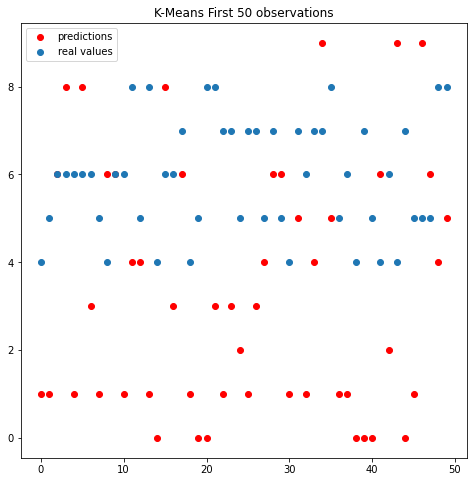

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         0
         1.0       0.00      0.00      0.00         0
         2.0       0.00      0.00      0.00        13
         3.0       0.01      0.02      0.01        91
         4.0       0.03      0.02      0.03       295
         5.0       0.00      0.00      0.00       489
         6.0       0.40      0.19      0.26      1167
         7.0       0.17      0.00      0.01       787
         8.0       0.04      0.04      0.04       235
         9.0       0.01      0.31      0.01        13

    accuracy                           0.08      3090
   macro avg       0.06      0.06      0.04      3090
weighted avg       0.20      0.08      0.10      3090



In [33]:
from sklearn.cluster import KMeans

def kmeans_pred_model( test_split, X_set, y_set, shouldGraph = False):
    X_train, X_test, y_train, y_test = train_test_split(X_set, y_set, test_size = test_split, random_state = 35)
    kmeans = KMeans(n_clusters=10, random_state=0)
    kmeans.fit(X_train, y_train)
    y_predict = kmeans.predict( X_test)
    if shouldGraph:
        x_axis = range(len(y_set))[:50]

        plt.figure(figsize=(8, 8))
        plt.scatter(x_axis, y_predict[:50], color="red", label="predictions")
        plt.scatter(x_axis, y_test[:50], label="real values")
        plt.title("K-Means First 50 observations")
        plt.legend()
        plt.show()
    print(metrics.classification_report(y_test, y_predict))


#### KMeans led to less than 0.1 accuracy on every run
print( "KMeans with testing 30%")
kmeans_pred_model( 0.30, X, y,1)

In [34]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

#### Selecting the best 10 features
X_ten = SelectKBest(chi2, k=10).fit_transform(X, y)
#### Led to only around 35% accuracy
print( "KNeighborsClassifier with testing 30%, best 10 features")
knn_pred_model( 0.30, X_ten, y)

KNeighborsClassifier with testing 30%, best 10 features
              precision    recall  f1-score   support

         2.0       0.00      0.00      0.00        13
         3.0       0.15      0.09      0.11        91
         4.0       0.23      0.22      0.23       295
         5.0       0.27      0.29      0.28       489
         6.0       0.43      0.51      0.47      1167
         7.0       0.39      0.36      0.38       787
         8.0       0.22      0.07      0.11       235
         9.0       0.00      0.00      0.00        13

    accuracy                           0.36      3090
   macro avg       0.21      0.19      0.20      3090
weighted avg       0.35      0.36      0.35      3090



In [35]:
from sklearn.tree import DecisionTreeClassifier

def dtc_pred_model( X_set, y_set, X_train, X_test, y_train, y_test):
    dtc = DecisionTreeClassifier()
    dtc.fit(X_train, y_train)
    y_pred = dtc.predict(X_test)
    print(metrics.classification_report(y_test, y_pred))

#### using a DecisionTreeClassifier led to lower accuracy than previous models
dtc_pred_model( X, y, X_train, X_test, y_train, y_test)

              precision    recall  f1-score   support

         2.0       0.00      0.00      0.00        13
         3.0       0.12      0.12      0.12        91
         4.0       0.24      0.22      0.23       295
         5.0       0.24      0.25      0.24       489
         6.0       0.41      0.42      0.41      1167
         7.0       0.36      0.35      0.36       787
         8.0       0.14      0.14      0.14       235
         9.0       0.14      0.08      0.10        13

    accuracy                           0.32      3090
   macro avg       0.21      0.20      0.20      3090
weighted avg       0.32      0.32      0.32      3090



In [36]:
# Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB

def nb_pred_model(test_split, X_set, y_set):
    X_train, X_test, y_train, y_test = train_test_split(X_set, y_set, test_size = test_split, random_state = 35)
    gaussian = GaussianNB()
    gaussian.fit(X_train, y_train)
    y_pred = gaussian.predict(X_test)
    print(metrics.classification_report(y_test, y_pred))

nb_pred_model(0.30, X, y)

              precision    recall  f1-score   support

         2.0       0.00      0.92      0.01        13
         3.0       0.03      0.03      0.03        91
         4.0       0.00      0.00      0.00       295
         5.0       0.00      0.00      0.00       489
         6.0       0.49      0.03      0.06      1167
         7.0       0.44      0.10      0.17       787
         8.0       0.18      0.02      0.03       235
         9.0       0.03      0.54      0.05        13

    accuracy                           0.05      3090
   macro avg       0.15      0.21      0.04      3090
weighted avg       0.31      0.05      0.07      3090



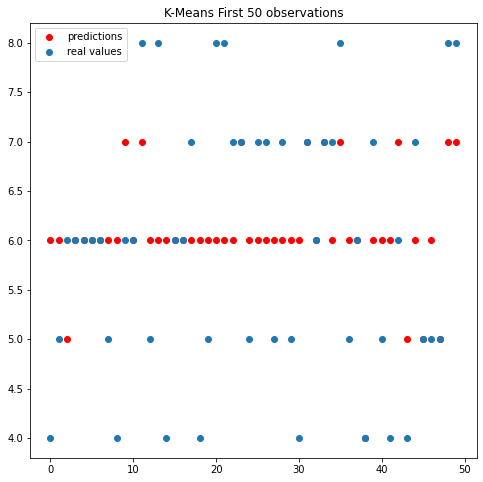

              precision    recall  f1-score   support

         2.0       0.00      0.00      0.00        13
         3.0       0.00      0.00      0.00        91
         4.0       0.32      0.19      0.24       295
         5.0       0.30      0.19      0.24       489
         6.0       0.44      0.73      0.55      1167
         7.0       0.45      0.36      0.40       787
         8.0       0.31      0.04      0.07       235
         9.0       0.00      0.00      0.00        13

    accuracy                           0.42      3090
   macro avg       0.23      0.19      0.19      3090
weighted avg       0.38      0.42      0.38      3090



In [37]:
from sklearn.ensemble import RandomForestClassifier

def rand_forest_model( test_split, X_set, y_set, should_graph=False):
    X_train, X_test, y_train, y_test = train_test_split(X_set, y_set, test_size = test_split, random_state = 35)
    rand_forest = RandomForestClassifier( max_depth=10)
    rand_forest.fit(X_train, y_train)
    y_pred = rand_forest.predict(X_test)
    if should_graph:
        x_axis = range(len(y_set))[:50]

        plt.figure(figsize=(8, 8))
        plt.scatter(x_axis, y_pred[:50], color="red", label="predictions")
        plt.scatter(x_axis, y_test[:50], label="real values")
        plt.title("K-Means First 50 observations")
        plt.legend()
        plt.show()
    print(metrics.classification_report(y_test, y_pred))

rand_forest_model( 0.30, X_ten, y, True)